In [6]:
import seaborn as sns
import numpy as np
from pathlib import Path
from face_lib.datasets.arcface_ijb import IJB_aligned_images
import matplotlib.pyplot as plt

## Here we plot dataset uncertainty distribution

In [7]:
dataset_to_path = {
    "IJBB": "/app/datasets/arcface_ijb/IJBB",
    "IJBC": "/app/datasets/arcface_ijb/IJBC",
    "survFace": "/app/datasets/QMUL-SurvFace/Face_Identification_Test_Set",
}

### SCF

/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

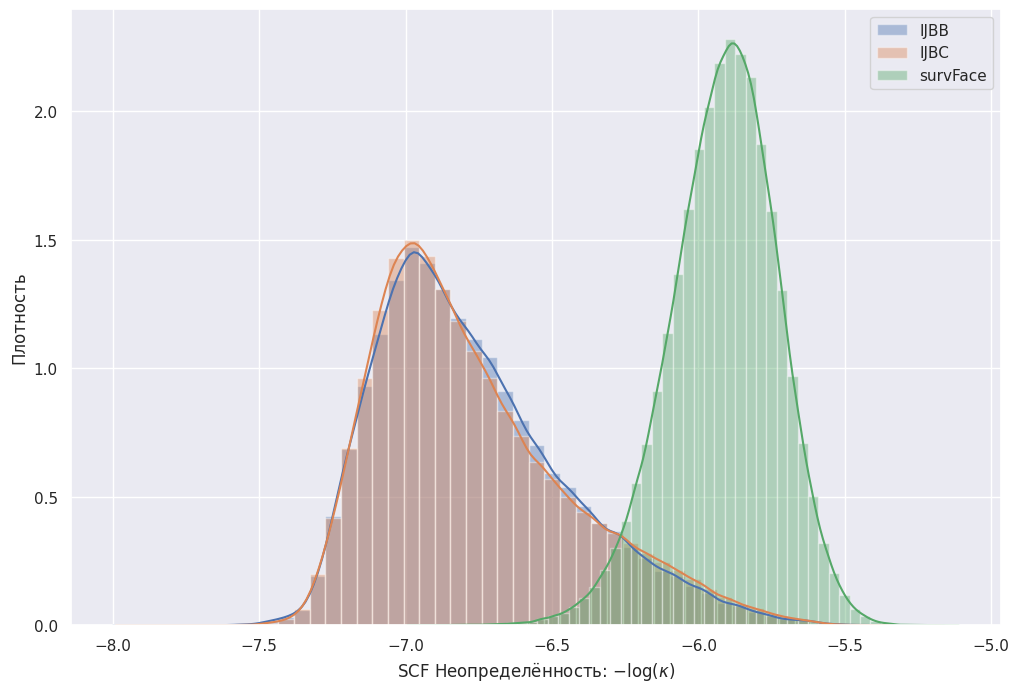

In [8]:
sns.set_theme()
plt.figure(figsize=(12, 8))
for dataset_name in dataset_to_path.keys():
    unc = np.load(
        Path(dataset_to_path[dataset_name])
        / "embeddings"
        / f"scf_embs_{dataset_name}.npz"
    )["unc"]
    sns.distplot(
        -unc[:, 0],
        kde=True,
        norm_hist=True,
        hist=True,
        label=dataset_name,
    )
    plt.ylabel(f"Плотность")
    plt.xlabel(f"SCF Неопределённость: $-\log (\kappa)$")

plt.legend()

/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

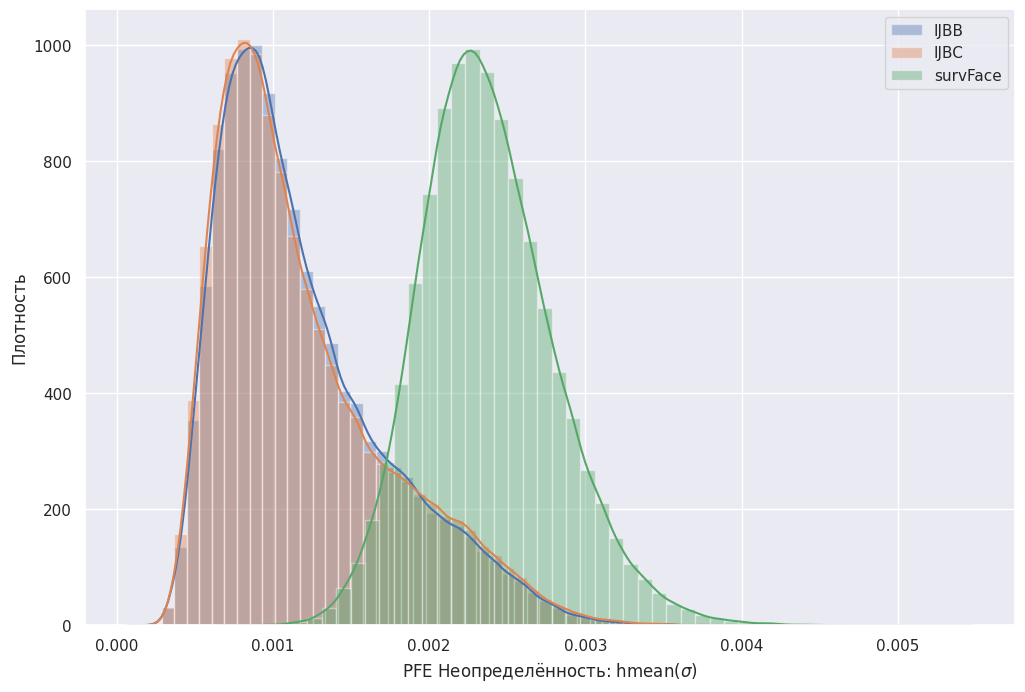

In [38]:
import scipy

sns.set_theme()
plt.figure(figsize=(12, 8))
for dataset_name in dataset_to_path.keys():
    unc = np.load(
        Path(dataset_to_path[dataset_name])
        / "embeddings"
        / f"pfe_embs_{dataset_name}.npz"
    )["unc"]
    sigma_sq = np.exp(unc)
    unc_proc = scipy.stats.hmean(sigma_sq, axis=1, keepdims=True)
    sns.distplot(
        unc_proc,
        kde=True,
        norm_hist=True,
        hist=True,
        label=dataset_name,
    )
s = "$(\sigma)$"
plt.ylabel(f"Плотность")
plt.xlabel(f"PFE Неопределённость: hmean{s}")

plt.legend()